<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/quests/EDAs/EDA_LetalCarOfContractType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## EDA 각 과정에서 insight 도출
- 제안 3: 연체 위험도 예측
  - 문제 정의: 고객의 연체 기록, 신용 등급, 계약 유형 등을 사용하여 미래의 연체 가능성을 예측합니다.
  - 배경: 연체 위험도가 높은 고객을 사전에 식별하여, 적절한 조치를 취함으로써 재정적 손실을 최소화할 수 있습니다.



In [3]:
import pandas as pd
import seaborn as sns
df_RCOCT = pd.read_csv('RentalCarOfContractType.csv')
df_RCOCT.dropna(inplace=True)
df_RCOCT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40480 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 40480 non-null  int64  
 1   type_of_contract   40480 non-null  object 
 2   type_of_contract2  40480 non-null  object 
 3   channel            40480 non-null  object 
 4   datetime           40480 non-null  object 
 5   Term               40480 non-null  int64  
 6   payment_type       40480 non-null  object 
 7   product            40480 non-null  object 
 8   amount             40480 non-null  int64  
 9   state              40480 non-null  object 
 10  overdue_count      40480 non-null  int64  
 11  overdue            40480 non-null  object 
 12  credit rating      40480 non-null  float64
 13  bank               40480 non-null  object 
 14  cancellation       40480 non-null  object 
 15  age                40480 non-null  float64
 16  Mileage            404

In [4]:
df_RCOCT

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,66799197,렌탈,Promotion,영업방판,2020-02-03,39,카드이체,K5,120900,해약확정,0,없음,1.0,롯데카드,해약,48.0,1869.0
51296,66792778,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,카드이체,K1,96900,계약확정,0,없음,2.0,롯데카드,정상,44.0,1947.0
51297,66799607,렌탈,Normal,홈쇼핑/방송,2020-02-03,60,CMS,K1,96900,해약확정,0,없음,8.0,신한은행,해약,70.0,2623.0
51300,66799558,렌탈,Normal,영업방판,2020-02-03,60,카드이체,K1,96900,해약확정,0,없음,8.0,롯데카드,해약,39.0,1753.0


### 기술 데이터 분석(DDA)

In [5]:
# 고객의 연체 여부 확인
df_RCOCT['overdue'].value_counts()
# 전체 고객 중 3%가 연체됨

없음    39019
있음     1461
Name: overdue, dtype: int64

In [6]:
# 고객의 연체 기록 확인
df_RCOCT['overdue_count'].value_counts()
# 1회 연체한 고객의 수가 가장 많음

 0     39007
 1       589
 2       269
 3       101
 12       87
 4        78
 10       54
 5        52
 7        44
 8        41
 11       37
 9        34
 14       31
 13       30
-1        12
 15       10
 6         4
Name: overdue_count, dtype: int64

In [49]:
# 신용 등급
condition = "overdue == '있음'"
percent_credit_rating=(df_RCOCT.query(condition)['credit rating'].value_counts()/df_RCOCT['credit rating'].value_counts())*100
percent_credit_rating= percent_credit_rating.sort_values(ascending=False)
percent_credit_rating
# 신용 등급이 7,8인 고객들에게서 연체 고객의 비율이 높음
# 인사이트 : 신용 등급이 낮은 고객의 경우 계약 시 주의 필요

9.0     22.131148
8.0     20.600273
10.0    20.000000
7.0     13.634608
6.0      6.870861
0.0      5.000000
5.0      3.620019
4.0      2.219194
3.0      1.256018
2.0      0.601716
1.0      0.390434
Name: credit rating, dtype: float64

In [8]:
# 계약 유형
condition = "overdue == '있음'"
(df_RCOCT.query(condition)['type_of_contract'].value_counts()/df_RCOCT['type_of_contract'].value_counts())*100
# 계약 유형에 따른 연체 고객/전체 고객 비율은 큰 차이 없음


렌탈     3.615555
멤버십    3.488943
Name: type_of_contract, dtype: float64

In [62]:
# 계약 기간
condition = "overdue == '있음'"
percent_term = (df_RCOCT.query(condition)['Term'].value_counts()/df_RCOCT['Term'].value_counts())*100
percent_term = percent_term.sort_values(ascending=False)
percent_term
# 39개월 계약한 고객들에게서 연체 고객의 비율이 높음
# 인사이트 : 39개월과 관련된 프로모션이나 정책이 있는지 확인 필요

39    10.876133
36     4.161074
12     3.497537
60     3.474341
Name: Term, dtype: float64

In [63]:
# 지불 방식
condition = "overdue == '있음'"
percent_payment = (df_RCOCT.query(condition)['payment_type'].value_counts()/df_RCOCT['payment_type'].value_counts())*100
percent_payment = percent_payment.sort_values(ascending=False)
percent_payment
# 자동이체 방식을 이용하는 고객에게서 연체된 고객의 비율이 높음
# 인사이트 : 자동이체하는 고객들에게 자동이체일 전에 미리 공지 고려

CMS     4.864124
카드이체    1.288188
Name: payment_type, dtype: float64

In [31]:
# 연령대
condition = "overdue == '있음'"
df_RCOCT['age_group'] = df_RCOCT['age'].astype(str)
df_RCOCT['age_group'] = df_RCOCT['age_group'].str.slice(0,1)+'0'
df_RCOCT
(df_RCOCT.query(condition)['age_group'].value_counts()/df_RCOCT['age_group'].value_counts())*100
# 연령대에 따른 연체고객/전체고객 비율은 큰 차이가 없음


Int64Index([    0,     1,     2,     3,     4,     5,     6,     8,     9,
               10,
            ...
            51283, 51286, 51290, 51292, 51294, 51295, 51296, 51297, 51300,
            51303],
           dtype='int64', length=40480)


### EDA
- 추가 확인 후 인사이트 재 조정

Text(0.5, 0, '신용 등급 별 연체 고객 차지 비율')

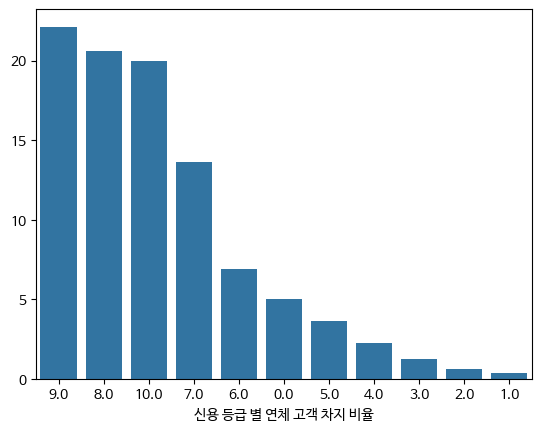

In [55]:
# 신용 등급 별 연체 고객 차지 비율 확인
df_RCOCT.query(condition)
percent_credit_rating.index=percent_credit_rating.index.astype(str)
sns.barplot(x=percent_credit_rating.index, y=percent_credit_rating.values)
plt.xlabel("신용 등급 별 연체 고객 차지 비율")

Text(0.5, 0, '계약기간 별 연체 고객 차지 비율')

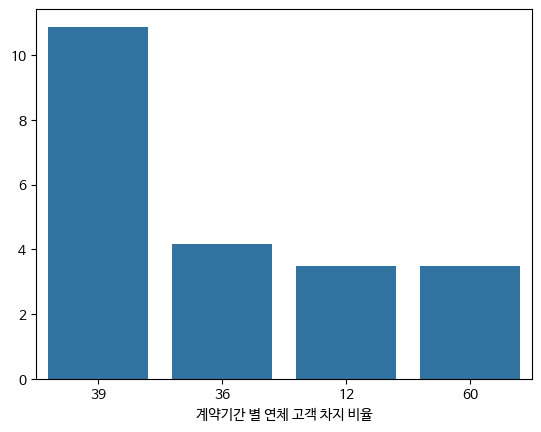

In [60]:
# 계약 기간 별 연체 고객 차지 비율 확인
df_RCOCT.query(condition)
percent_term.index=percent_term.index.astype(str)
sns.barplot(x=percent_term.index, y=percent_term.values)
plt.xlabel("계약기간 별 연체 고객 차지 비율")

Text(0.5, 0, '지불 방식 별 연체 고객 차지 비율')

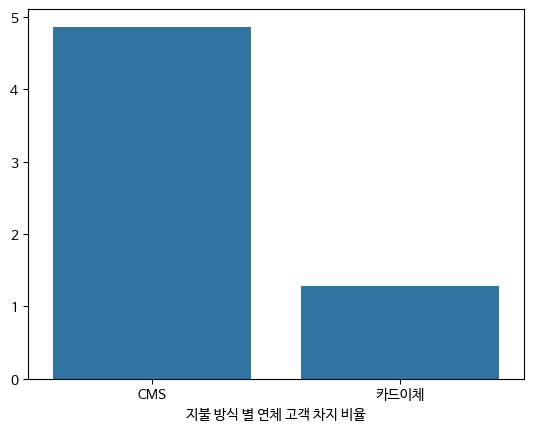

In [65]:
# 지불 방식 별 연체 고객 차지 비율 확인
df_RCOCT.query(condition)
percent_payment.index=percent_payment.index.astype(str)
sns.barplot(x=percent_payment.index, y=percent_payment.values)
plt.xlabel("지불 방식 별 연체 고객 차지 비율")

## 보고용 insight 작성

- 지불 방식 별 연체 고객 차지 비율 인사이트
  + 분석 결과 :  자동이체 방식을 이용하는 고객에게서 연체된 고객의 비율이 높음
  + 전략 제안 : 자동이체하는 고객들에게 자동이체일 전에 미리 공지 고려
-  계약 기간 별 연체 고객 차지 비율 인사이트
  + 분석 결과 :  39개월 계약한 고객들에게서 연체 고객의 비율이 높음
  + 전략 제안 : 39개월과 관련된 프로모션이나 정책이 있는지 확인 필요
- 신용 등급 별 연체 고객 차지 비율 인사이트
  + 분석 결과 :  신용 등급이 7,8인 고객들에게서 연체 고객의 비율이 높음
  + 전략 제안 : 신용 등급이 낮은 고객의 경우 계약 시 주의 필요